In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv file

df = pd.read_csv('Copper_Set.xlsx - Result 1.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
for i in list(df.columns):
    print(f'{i}:{df[i].nunique()}')

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [5]:
#converting obj to float
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d',errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce').dt.date

In [6]:
#make additional features
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['delivery_time_taken'] = (df['item_date'] - df['delivery date']).abs().dt.days

In [7]:
df.dtypes

id                             object
item_date              datetime64[ns]
quantity tons                 float64
customer                      float64
country                       float64
status                         object
item type                      object
application                   float64
thickness                     float64
width                         float64
material_ref                   object
product_ref                     int64
delivery date          datetime64[ns]
selling_price                 float64
delivery_time_taken           float64
dtype: object

In [8]:
df.isnull().sum()

id                         2
item_date                  3
quantity tons              1
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              3
selling_price              1
delivery_time_taken        6
dtype: int64

In [9]:
#handling material ref value starts with 0000 and checking null values
df['material_ref'] = df['material_ref'].apply(lambda x : np.nan if str(x).startswith('0000') else x)
df['material_ref'].isnull().sum()

100645

In [10]:
#dropping some columns
df.drop(columns=['id','item_date','delivery date','material_ref'],inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [12]:
df['quantity tons'] = df['quantity tons'].apply(lambda x : np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x : np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00000,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [13]:
df.isnull().sum()

quantity tons           5
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           8
delivery_time_taken     6
dtype: int64

In [14]:
#handling null values using median and mode
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df['delivery_time_taken'].fillna(df['delivery_time_taken'].median(),inplace=True)

In [15]:
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [16]:
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [17]:
#copying the dataframe
df_1 = df.copy()
df_1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0


In [18]:
for col in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
    print(col)
    print(skew(df_1[col]))

quantity tons
424.68730994731504
customer
86.9845901502091
country
0.7538286488466676
application
0.7245583983073829
thickness
303.4450657126513
width
0.37459367901082125
product_ref
1.0152071910463223
selling_price
301.38559971625915
delivery_time_taken
0.46972996509615955


In [19]:
#func for boxplot,histplot, violin plot understand through visualize
def plot(df, column):
    plt.figure(figsize=(30,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'Boxplot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,kde=True,bins=50,x=column)
    plt.title(f'Histplot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column)
    plt.title(f'Violinplot for {column}')

In [20]:
# for i in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
#     plot(df_1,i)

In [21]:
#handling skewers and outliers with log transformation

df_1['quantity_tons_log'] = np.log(df_1['quantity tons'])
df_1['thickness_log'] = np.log(df_1['thickness'])
df_1['selling_price_log'] = np.log(df_1['selling_price'])
df_1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0,6.666354,1.386294,6.357842


In [22]:
#droping original columns

df_1.drop(columns=['quantity tons','thickness','selling_price'],inplace=True)
df_1.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,31.0,6.666354,1.386294,6.357842


In [23]:
#handling outliers with IQR and clipping method

def outliers(df,column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold,upper_threshold)

In [24]:
#handling outliers

outliers(df_1,'quantity_tons_log')
outliers(df_1,'selling_price_log')
outliers(df_1,'thickness_log')
outliers(df_1,'width')
df_1

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [25]:
#plotting after skew and outliers 

# for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
#     plot(df_1, i)

In [26]:
#any columns are highly correlated using heatmap

# col = df_1[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log','delivery_time_taken']].corr()
# plt.figure(figsize=(12,6))
# sns.heatmap(col,annot=True)

In [27]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
#REGRESSION MODEL TO PREDICT SELLING PRICE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
import numpy as np
import pickle as pkl
from xgboost import XGBRegressor

In [29]:
df_2 = df_1.copy()
df_2

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [30]:
#checking values countt o encoding the categorical features

df_2['status'].value_counts()

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [31]:
# using map function encoding the values in status column
df_2["status"]= df_2["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df_2['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [32]:
#categorical encoding
df_2['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [33]:
#using ordinal encoder to encode the values

df_2['item type'] = OrdinalEncoder().fit_transform(df_2[['item type']])
df_2['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [34]:
df_2

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [35]:
#Functions to choose best algorithm

def best_ML_algorithm(df,algorithms):
    x = df.drop(columns=['selling_price_log'],axis=1)
    y = df['selling_price_log']

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

    results = {}

    for algorithm in algorithms:
        model = algorithm().fit(x_train,y_train)
        y_pred = model.predict(x_test)

        MAE = metrics.mean_absolute_error(y_test,y_pred)
        MSE = metrics.mean_squared_error(y_test,y_pred)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
        r2 = metrics.r2_score(y_test,y_pred)

        results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}

    best_algorithm = max(results.items(),key=lambda item : item[1]['R² score'])[0]

    return best_algorithm,results


In [36]:
#using above function to get best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]

best_algorithm, results = best_ML_algorithm(df_2,algorithms)

results_df = pd.DataFrame(results).transpose()

print('Evaluation Metrics for all algorithms')
print(results_df.to_string())

print('Best Algorithm:',best_algorithm)

Evaluation Metrics for all algorithms
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.162836            0.045489                 0.213281  0.302651
DecisionTreeRegressor                 0.053913            0.010080                 0.100401  0.845467
ExtraTreesRegressor                   0.046084            0.005690                 0.075431  0.912774
RandomForestRegressor                 0.045891            0.005568                 0.074616  0.914649
GradientBoostingRegressor             0.118059            0.021459                 0.146488  0.671036
XGBRegressor                          0.079373            0.011073                 0.105230  0.830243
Best Algorithm: RandomForestRegressor


In [37]:
#hyper parameter tuning to identify the best prmtr using gridsearch cv
x = df_2.drop(columns = ['selling_price_log'],axis=1)
y = df_2['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

param_grid = {'n_estimators' : [100,150],
              'max_depth' : [10,20],
              'min_samples_split' : [2,4],
              'min_samples_leaf' : [1,2],
              'max_features' : ['sqrt','log2',None]}


grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid
                           ,cv=3,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.8956187855731619)

In [38]:
#with best algortihm matching the parameter from above result and train the model
x = df_2.drop(columns=['selling_price_log'],axis=1)
y = df_2['selling_price_log']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,min_samples_split=2,min_samples_leaf=1,max_features=None,max_depth=20)
model_regressor.fit(x_train,y_train)

y_pred = model_regressor.predict(x_test)

#evaluationMetrics
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.04859385725203184
Mean Squared Error: 0.005840321865037851
Root Mean Squared Error: 0.07642199856741415
R-squared: 0.9104668389146123


In [39]:
#checking the features scores and importants
feature_scores = pd.Series(model_regressor.feature_importances_,index=x_train.columns).sort_values(ascending = False)
feature_scores

product_ref            0.295520
delivery_time_taken    0.245289
status                 0.173194
country                0.072095
customer               0.067530
thickness_log          0.043742
quantity_tons_log      0.042079
application            0.023153
item type              0.019525
width                  0.017872
dtype: float64

In [40]:
#store the model in pickle

with open('Regressor.pkl','wb') as files:
    pkl.dump(model_regressor,files)

In [41]:
#loading or reading the model from pkl to predict the selling price

with open('Regressor.pkl','rb') as files:
    predict_model = pkl.load(files)

pre = predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
np.exp(pre[0])
    

773.4999425780873

In [42]:
#Classifier model to predict the status

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [43]:
#fltr out the values W/L in sts col

df_c  =df_2[(df_2.status==1)|(df_2.status==0)]
df_c

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [44]:
df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

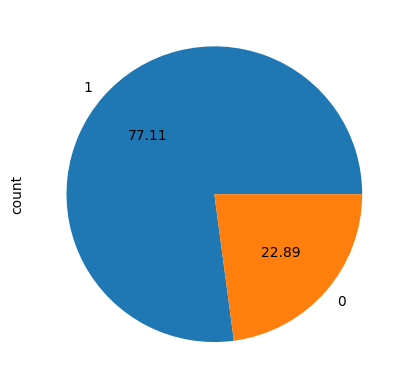

In [45]:
ax = df_c['status'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='count'>

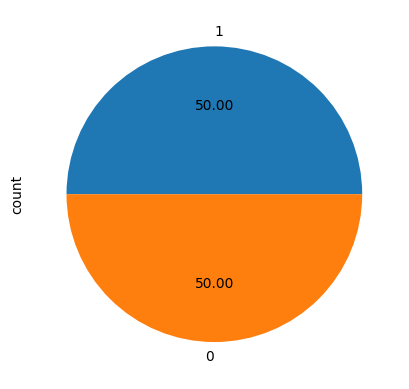

In [46]:
#handing imbalanced data using smote

smote = SMOTE()
x = df_c.drop('status',axis=1)
y = df_c['status']

x_smote,y_smote = smote.fit_resample(x,y)
ax = y_smote.value_counts().plot.pie(autopct= '%.2f')
ax

In [50]:
def best_class_ml_algorithm(x_smote,y_smote,algorithms):
    x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)
    results = {}

    

    for algorithm in algorithms:
        model = algorithm().fit(x_train,y_train)
        y_pred = model.predict(x_test)

        accuracy = metrics.accuracy_score(y_test,y_pred)
        precision = metrics.precision_score(y_test,y_pred)
        recall = metrics.recall_score(y_test,y_pred)
        f1 = metrics.f1_score(y_test,y_pred)

        results[algorithm.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}

    best_algorithm = max(results.items(), key=lambda item:item[1]['Accuracy score'])[0]

    return best_algorithm,results
                

In [51]:
#using above func try to identify the best algorithm

algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier, XGBClassifier]

best_algorithm,results = best_class_ml_algorithm(x_smote,y_smote,algorithms)
results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df)

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.955321   0.955591  0.954486  0.955038
ExtraTreesClassifier              0.976957   0.986210  0.967172  0.976598
RandomForestClassifier            0.975506   0.984765  0.965670  0.975124
GradientBoostingClassifier        0.804275   0.822537  0.773096  0.797050
XGBClassifier                     0.932853   0.950727  0.912209  0.931070
**Best Algorithm:** ExtraTreesClassifier


In [52]:
#hyper parameter tuning to identify the best parameter using gridearch cv

x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,train_size=0.3,random_state=42)

param_grid = {
    'n_estimators' : [50,100],
    'max_depth' : [10,20,25],
    'min_samples_split': [2,4],
    'min_samples_leaf':[1,2]
}

model = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)
grid_search.best_params_,grid_search.best_score_

({'max_depth': 25,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9508813813527628)

In [53]:
#best algorithm matching the parameter from above result and train the model

x_train, x_test,y_train,y_test = train_test_split(x_smote,y_smote,random_state=42,test_size=0.3)

model_classifier = ExtraTreesClassifier(n_estimators=100,max_depth=25,min_samples_leaf=1,min_samples_split=2)
model_classifier.fit(x_train,y_train)

y_pred = model_classifier.predict(x_test)

#evaluation metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[34617   386]
 [ 1965 32640]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35003
           1       0.99      0.94      0.97     34605

    accuracy                           0.97     69608
   macro avg       0.97      0.97      0.97     69608
weighted avg       0.97      0.97      0.97     69608



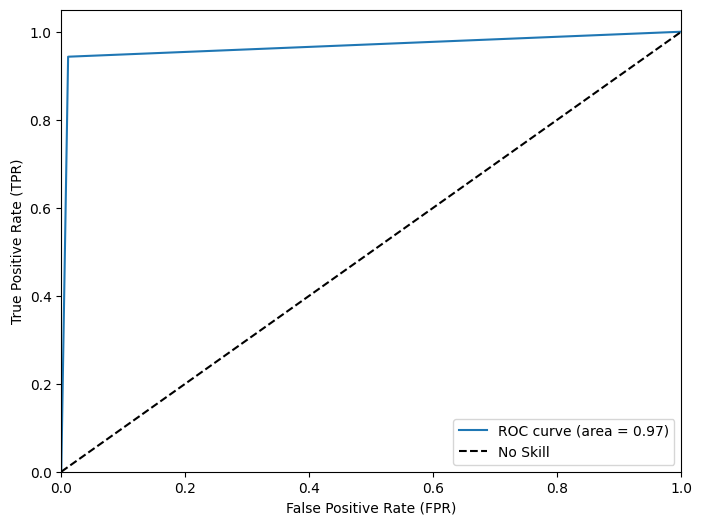

In [54]:
#reciever operating characteristic(roc) curve and area under the curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

In [55]:
#checking features scores and importance
feature_scores = pd.Series(model_classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores

delivery_time_taken    0.180570
item type              0.133888
customer               0.125155
country                0.115683
application            0.106893
quantity_tons_log      0.090275
selling_price_log      0.077390
product_ref            0.064726
thickness_log          0.062484
width                  0.042936
dtype: float64

In [56]:
#using pickle to store the files

with open('Classifier.pkl','wb') as files:
    pkl.dump(model_classifier,files)

In [59]:
#loading the pkl file to prediction

with open('Classifier.pkl','rb') as files:
    cls_model = pkl.load(files)

cls = cls_model.predict( np.array([[30156308.0,28.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if cls[0] == 1:
    print('Won')

else:
    print('Lose')

Won
